# A Multivariable Study of the Ames Housing Dataset

## Introduction

This study takes the popular [Ames Housing Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description) and creates a predicted `SalePrice` value for each of the `1460` houses in the set. The purpose of conducting this study is for personal improvement in the art of data science, with a long-term aim towards understanding machine-learning topics.

As the dataset contains an overabundance of features, `81` in total, this study progressively limits the scope of available features to mostly numeric values, for simplicity's sake.

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from IPython.core.display import Image

%matplotlib inline

## Constants

In [2]:
TOTAL_SAMPLE_SIZE = 1460
CURRENT_YEAR = 2020

# Initial Data Preparation

## Gather Data

In [3]:
# Import the train.csv file

data_train = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')

## Preliminary Data Visualization

Gain an initial visualization into the data set to initiate analysis.

In [4]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


## Note to Self

Show the full reasoning.txt file, to account for each column.

## Print All Column Names and Descriptions

In [6]:
with open('./data_description_abbreviated.txt', 'r') as file:
    abbreviated_data_description = file.read()
    
print(abbreviated_data_description)

- SalePrice:		the property's sale price in dollars -- the target variable
- MSSubClass:		The building class
- MSZoning:		The general zoning classification
- LotFrontage:		Linear feet of street connected to property
- LotArea:		Lot size in square feet
- Street:		Type of road access
- Alley:		Type of alley access
- LotShape:		General shape of property
- LandContour:		Flatness of the property
- Utilities:		Type of utilities available
- LotConfig:		Lot configuration
- LandSlope:		Slope of property
- Neighborhood:		Physical locations within Ames city limits
- Condition1:		Proximity to main road or railroad
- Condition2:		Proximity to main road or railroad (if a second is present)
- BldgType:		Type of dwelling
- HouseStyle:		Style of dwelling
- OverallQual:		Overall material and finish quality
- OverallCond:		Overall condition rating
- YearBuilt:		Original construction date
- YearRemodAdd:		Remodel date
- RoofStyle:		Type of roof
- RoofMatl:		Roof material
- Exterior1st:		Exterior covering o

## Test a Feature & the Target

### Display a sample scatter plot

In [7]:
# Create X using short notation
x = data_train[['YearBuilt']]
# x = DataFrame(data_train, columns=['YearBuilt'])
y = DataFrame(data_train, columns=['SalePrice'])

Text(0, 0.5, 'Sale Price')

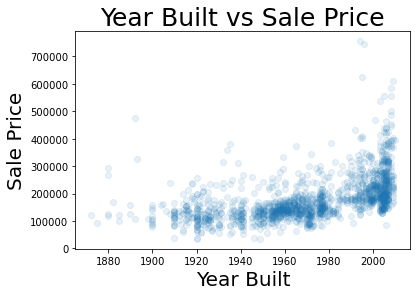

In [8]:
plt.scatter(x, y, alpha=0.1)
plt.title('Year Built vs Sale Price', fontsize=25)
plt.xlabel('Year Built', fontsize=20)
plt.ylabel('Sale Price', fontsize=20)

### Test a sample regression with the scatter plot

In [9]:
regr = LinearRegression()
regr.fit(x, y)

LinearRegression()

In [10]:
print(regr.coef_)

[[1375.37346794]]


Text(0, 0.5, 'Sale Price')

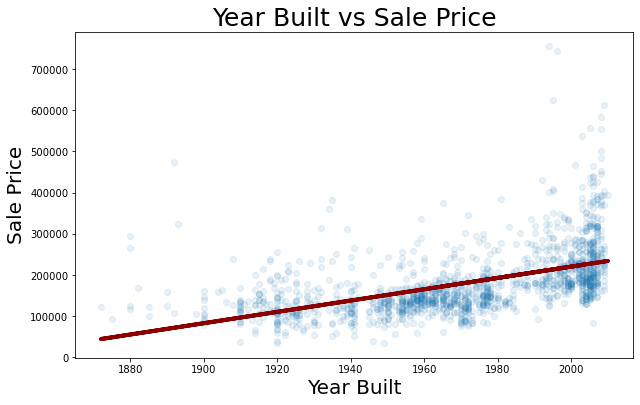

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.1)
plt.plot(x, regr.predict(x), color='darkred', linewidth=4)
plt.title('Year Built vs Sale Price', fontsize=25)
plt.xlabel('Year Built', fontsize=20)
plt.ylabel('Sale Price', fontsize=20)

### R-Squared Value (Goodness of Fit)
The amount of variation in price that can be explained by the year the house was built.

In [12]:
regr.score(x, y)

0.27342162073249154

## Discussion of Initial Precautions to Avoid Overfitting

#### Note the High Ratio of Sample Count to Feature Count 

This data set consists of only 1460 samples, but 81 features. This ratio of low sample count to high feature count can lead to overfitting.

A few simple solutions are as follows: 

-- Lean towards Linear Regression, as opposed to Logistic Regression

-- Carefully consider all non-numerical data, and consider cutting features where applicable

-- Also consider removing numerical data that is discrete and non-relevant (such as arbitrary numerical values for house types)

#### Managing Values of Zero for Non-ubiquitous Features

Furthermore, several of the remaining features are not present in every sample. 

In the non-representing data, the values of the feature are set to zero by default. 

To avoid overfitting, these data values can instead be set to the average value of all representing data for that feature

## Test Applicability of a Non-numerical Column

The following code tests whether one of the non-numerical columns, `MSZoning`, is fit for dropping the column altogether.

For the purposes of this limited study, only one non-numerical column is tested, for simplicity's sake. In practice, testing each non-numerical column individually and with futher code customizations might be necessary.

In [13]:
# Separate all data_train samples into their respective zoning types

names_of_zones = []
for i in range(0, len(data_train['MSZoning'].values.tolist())):
    curr_zone = data_train['MSZoning'].values[i]
    found = False
    j = 0
    for k in range(0, len(names_of_zones)):
        if curr_zone in names_of_zones[k][0]:
            found = True
            j = k
    if found:
        names_of_zones[j][1] = names_of_zones[j][1] + 1
    else:
        names_of_zones.append([curr_zone, 1])

for i in range(0, len(names_of_zones)):
    print(names_of_zones[i])
    

['RL', 1151]
['RM', 218]
['C (all)', 10]
['FV', 65]
['RH', 16]


## Observations on the Non-numerical Column

The total number of commercial properties is only `9`, while all of the remaining property types are of some residential purpose.

`9` total samples is not enough data to perform multivariable regression on commercial properties by themselves. For the purposes of this limited study, all commercial property will have to be coallesced with residential property at this time.

The study will attempt to keep in mind the limitations of residential data as applied to commercial property, watching for any adjustments that must be made to allow for higher accuracy for these `9` properties.

## Initial Data Flow Path

The following graphic displays an initial consideration of how the price-prediction model will consider different columns of available data.

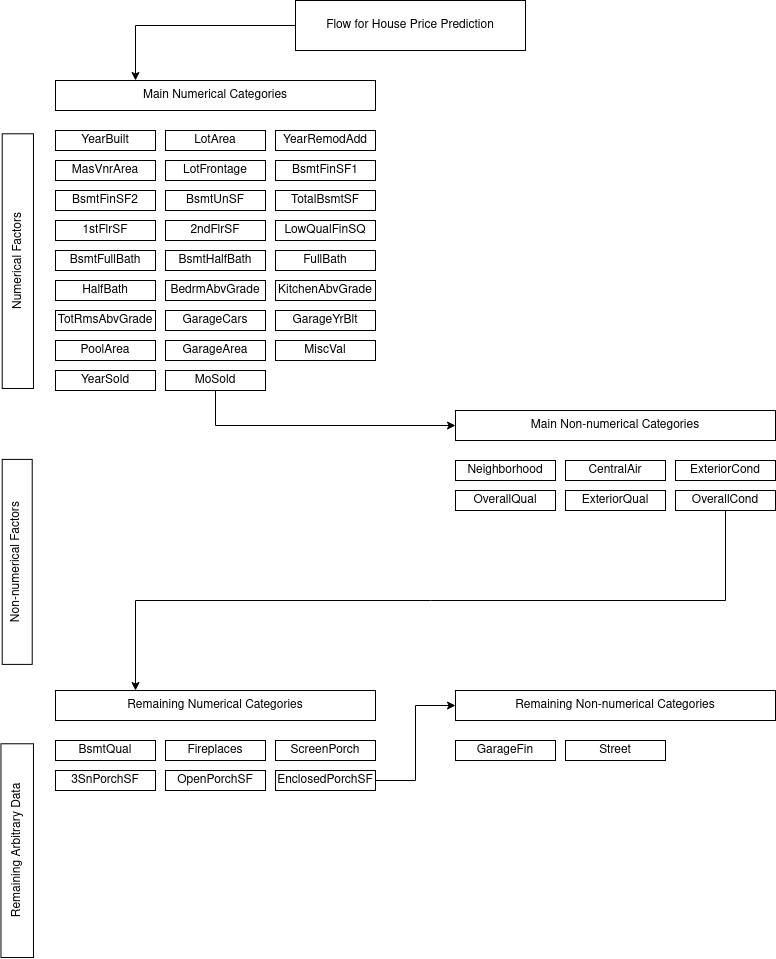

In [14]:
Image('./2020-08-25-ames-housing-flow-path.png') 

## Data Descriptions

Having created a flow chart with initial impressions, the following critique is made of data according to the results it provides from the `data_train.describe()` method. This section intends to further eliminate data categories that have many missing values (`0` or `NaN`), and data that is otherwise unfit for this brief multivariable-regression study.

In [15]:
pd.options.display.max_columns = None
display(data_train.describe())
columns_with_full_numerical_data = len(data_train.describe().columns)
print('Columns with full numerical data: ', columns_with_full_numerical_data)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Columns with full numerical data:  38


### Observations on Initial data_train.describe()

The `...describe()` method allows for easy elimination of columns, as columns that are fully non-numerical are automatically removed. Those that remain are either likely to be useful, or at least easy to identify as non-useful, given their additional information.

The `MSSubClass`, `OverallQual`, `OverallCond`, categories are misleading as they contain arbitrary numbers that describe non-numerical qualitative assessments of the property. They are removed, for simplicity's sake. 

`Neighborhood` and `CentralAir` are not visible here, but these data informers are kept in a separate data set, for second-tier consideration and for curiosity's sake.

The `YearBuilt`, `YearSold` categories are to be transformed into a column called `AgeWhenSold`, to simplify the data. The `MonthSold` column is dropped for simplicity's sake.

After considering the available data, and seeing the need to limit the scope of this multivariable study, the `MasVnrArea`, `Fireplaces`, `GarageYrBlt`, `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, and `MiscVal` columns also are dropped for simplicity's sake, even though much of their data is numerical.

Furthermore, the `TotalBsmtSF` is sufficient for the needs of this study, and therefore all other `Bsmt...` columns are also dropped.

## Initial Simplification of Dataset

In [16]:
# Capture target
target = DataFrame(data_train['SalePrice'])

# Display SalePrice
display(target)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [17]:
# Include only the useful numerical columns in the features_abbr variable
features_abbr = DataFrame(data_train, columns=['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'GarageCars', 'YrSold', 'YearBuilt'])

# Combine YearSold and YearBlt into AgeWhenSold
features_abbr['AgeWhenSold'] = features_abbr['YrSold'] - features_abbr['YearBuilt']

# Drop YrSold and 'YearBuilt'
features_abbr.drop(['YrSold', 'YearBuilt'], inplace=True, axis=1)

# Display Features
display(features_abbr)


,LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,GarageCars,AgeWhenSold
0,65.0,8450,856,856,854,0,1710,1,0,2,1,3,1,8,548,2,5
1,80.0,9600,1262,1262,0,0,1262,0,1,2,0,3,1,6,460,2,31
2,68.0,11250,920,920,866,0,1786,1,0,2,1,3,1,6,608,2,7
3,60.0,9550,756,961,756,0,1717,1,0,1,0,3,1,7,642,3,91
4,84.0,14260,1145,1145,1053,0,2198,1,0,2,1,4,1,9,836,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,953,953,694,0,1647,0,0,2,1,3,1,7,460,2,8
1456,85.0,13175,1542,2073,0,0,2073,1,0,2,0,3,1,7,500,2,32
1457,66.0,9042,1152,1188,1152,0,2340,0,0,2,0,4,1,9,252,1,69
1458,68.0,9717,1078,1078,0,0,1078,1,0,1,0,2,1,5,240,1,60


In [18]:
# Keep second-tier features for future analysis
second_tier = DataFrame(data_train, columns=['Neighborhood', 'CentralAir'])

display(second_tier)

,Neighborhood,CentralAir
0,CollgCr,Y
1,Veenker,Y
2,CollgCr,Y
3,Crawfor,Y
4,NoRidge,Y
...,...,...
1455,Gilbert,Y
1456,NWAmes,Y
1457,Crawfor,Y
1458,NAmes,Y


## Check for Null Values in Remaining Data
As mentioned before, with the high ratio of features to sample size, one method to combat overfitting is to find relevant zero and null values and set them to be equal to the average of all non-zero values for that feature.

In [19]:
display(pd.isnull(target).any())
print(' ')
display(pd.isnull(features_abbr).any())

SalePrice    False
dtype: bool

LotFrontage      True
LotArea         False
TotalBsmtSF     False
1stFlrSF        False
2ndFlrSF        False
LowQualFinSF    False
GrLivArea       False
BsmtFullBath    False
BsmtHalfBath    False
FullBath        False
HalfBath        False
BedroomAbvGr    False
KitchenAbvGr    False
TotRmsAbvGrd    False
GarageArea      False
GarageCars      False
AgeWhenSold     False
dtype: bool

#### Observations on Null Values

The `LotFrontage` column has null values, and all others are clean. 

Perhaps the frontage null values come from properties that are not connected to a street -- for example, an apartment or distant property.

In [20]:
# Count the number of null values in LotFrontage

null_count = 0
for val in features_abbr['LotFrontage']:
    if np.isnan(val):
        null_count += 1
        
print('Number of NaN values in the LotFrontage column: ', null_count)

Number of NaN values in the LotFrontage column:  259


### Discussion

With `259` `NaN` values, the `LotFrontage` column becomes suspect as a reliable feature.

If a simple explanation can be found, such as that `NaN` values related to a property that has no street frontage, the column may be worth saving.

A simple test of observation on the first found `NaN` value is conducted.

In [21]:
# Check for a lot type value in the full data_train set, to see why the LotFrontage value might be null
first_val_null = 0

for i in range(len(features_abbr['LotFrontage'])):
    if np.isnan(features_abbr['LotFrontage'][i]):
        first_val_null = i
        break

display(data_train.loc[[first_val_null]])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000


#### Discussion

Shown above is the first property that has a `NaN` value, and it does not have a simple explanation for its lack of data.

The property seems to be not too old, has a corner slot, paved street access, and even a porch and a shed. 

With no ready reason to keep the `LotFrontage` data included, nor any way of easily substituting the data, the column itself asks for further examination.

However, there is still too a high number of features available for regression, and therefore dropping this potentially misleading column is the determined course of action.

`LotFrontage` is dropped as a feature.

In [22]:
features_abbr.drop(['LotFrontage'], inplace=True, axis=1)

## Search for Zero Values Across All Columns

In [23]:
fd = features_abbr.describe()

fd.loc['min']

LotArea         1300.0
TotalBsmtSF        0.0
1stFlrSF         334.0
2ndFlrSF           0.0
LowQualFinSF       0.0
GrLivArea        334.0
BsmtFullBath       0.0
BsmtHalfBath       0.0
FullBath           0.0
HalfBath           0.0
BedroomAbvGr       0.0
KitchenAbvGr       0.0
TotRmsAbvGrd       2.0
GarageArea         0.0
GarageCars         0.0
AgeWhenSold        0.0
Name: min, dtype: float64

### Observations on Columns with Zero Values

The majority of columns have zero values. More examination is needed to know whether any of the columns should have average values placed over the zero values to avoid overfitting.

##### TotalBsmtSF

A property with `0` for this value would indicate that it has no basement. The discrete nature of this data, when compared to the other properties that do have a variable amount of basement s.f. area, means that this data may gain from having the data values substituted. This category is a good example of where zero values should be substituted with average values.

##### 2ndFlrSF

Similar to TotalBsmtSF. Zero values should be replaced with average values.


##### LowQualFinSF

The houses that are low quality in finished s.f. are likely to be more valuable than houses with data here. Setting the data to average values would lower the price predictions for the high-priced homes. Preliminary visualizations of the data above, as shown in the YearBuilt vs SalePrice visualizations, suggest that when a house is priced high, it is likely much higher than a predicted value. Nevertheless, this zero data should also be substituted with average values, as the counter decision feels intuitively wrong.

##### GarageArea

This one should also have values replaced, as the discrete value of zero is likely highly different than the rest of the variable data.

##### All Bathroom Counts, Kitchen Counts, Room Counts, and GarageCar Counts

A zero-bathroom house is likely relevant for price prediction, and these data columns are by nature highly discrete. There is no need to replace the zero values with average values here.

##### AgeWhenSold

The zero values here are relevant, similar to bathroom counts and others, and therefore zero values can stay.

In [24]:
# Set column names for averaging out zero values

cols_for_z_avg = ['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea']

# Set all appropriate zero values to NaN using the mask method
for i in range(len(cols_for_z_avg)):
    features_abbr[cols_for_z_avg[i]] = features_abbr[cols_for_z_avg[i]].mask(features_abbr[cols_for_z_avg[i]] == 0)
    
# Fill all NaN values with the mean of that column
for i in range(len(cols_for_z_avg)):
    features_abbr[cols_for_z_avg[i]] = features_abbr[cols_for_z_avg[i]].fillna(round(features_abbr[cols_for_z_avg[i]].mean(), 0))

In [25]:
display(features_abbr.info())
display(features_abbr.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   TotalBsmtSF   1460 non-null   float64
 2   1stFlrSF      1460 non-null   int64  
 3   2ndFlrSF      1460 non-null   float64
 4   LowQualFinSF  1460 non-null   float64
 5   GrLivArea     1460 non-null   int64  
 6   BsmtFullBath  1460 non-null   int64  
 7   BsmtHalfBath  1460 non-null   int64  
 8   FullBath      1460 non-null   int64  
 9   HalfBath      1460 non-null   int64  
 10  BedroomAbvGr  1460 non-null   int64  
 11  KitchenAbvGr  1460 non-null   int64  
 12  TotRmsAbvGrd  1460 non-null   int64  
 13  GarageArea    1460 non-null   float64
 14  GarageCars    1460 non-null   int64  
 15  AgeWhenSold   1460 non-null   int64  
dtypes: float64(4), int64(12)
memory usage: 182.6 KB


None

,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,GarageCars,AgeWhenSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1084.926027,1162.626712,802.942466,328.003425,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,500.775342,1.767123,36.547945
std,9981.264932,404.189040,386.587738,179.620915,21.884816,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,180.452676,0.747315,30.250152
min,1300.000000,105.000000,334.000000,110.000000,53.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,160.000000,0.000000,0.000000
25%,7553.500000,816.000000,882.000000,803.000000,328.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,389.750000,1.000000,8.000000
50%,9478.500000,1017.000000,1087.000000,803.000000,328.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,493.000000,2.000000,35.000000
75%,11601.500000,1298.250000,1391.250000,803.000000,328.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,576.000000,2.000000,54.000000
max,215245.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,1418.000000,4.000000,136.000000


## Checking second_tier Data for Continuity

In [26]:
# Check value counts for both columns of second_tier
neighborhood_counts = second_tier['Neighborhood'].value_counts()
centralair_counts = second_tier['CentralAir'].value_counts()

display(neighborhood_counts)
print(' ')
display(centralair_counts)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Y    1365
N      95
Name: CentralAir, dtype: int64

## Final Observations for Data Cleaning

The data present in the `features_abbr` pandas DataFrame is cleaned and prepared for analysis. 

There are `16` columns of data with each having valuable numerical data.

These columns provide the principal data for the multivariable regression of this brief study.

There is also a `second_tier` variable that contains two non-numerical values. Upon viewing all of the available features and data, these two non-numerical features are not to be used in the price-prediction model. They still, however, are kept handy for curiosity's sake. Their data appears to be continuous, without `NaN` or otherwise misleading values.

## Updated Flow for House Price Predictions

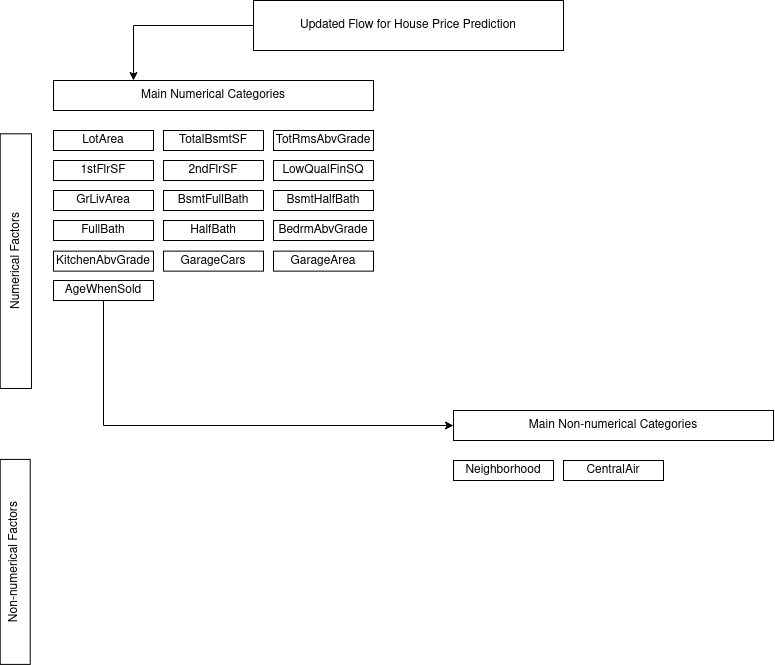

In [27]:
Image('./2020-08-26-updated-ames-housing-flow-path.png')

# Visualizing the Data

## Probability Density Functions

### Price vs Quantity Sold

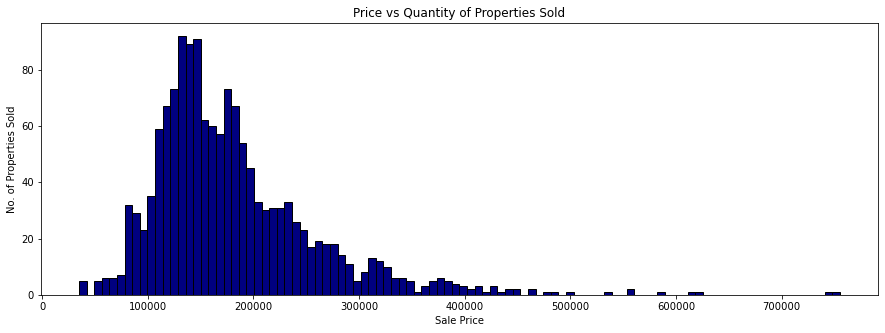

In [28]:
# Histogram of the target
plt.figure(figsize=(15,5))
plt.hist(target['SalePrice'], bins=100, ec='black', color='navy')
plt.title('Price vs Quantity of Properties Sold')
plt.ylabel('No. of Properties Sold')
plt.xlabel('Sale Price')
plt.show()

### Sample of Probability Density Functions of Features

The following graphics display a few select useful probability density functions for the many features included in analysis.

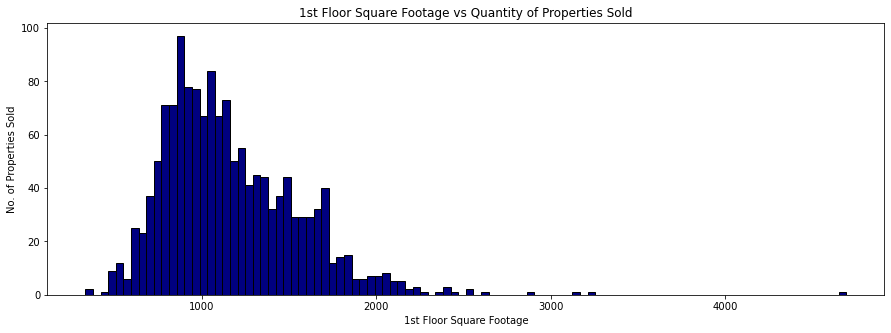

In [29]:
# Histogram of the 1stFlrSF
plt.figure(figsize=(15,5))
plt.hist(features_abbr['1stFlrSF'], bins=100, ec='black', color='navy')
plt.title('1st Floor Square Footage vs Quantity of Properties Sold')
plt.ylabel('No. of Properties Sold')
plt.xlabel('1st Floor Square Footage')
plt.show()

#### Important Note

Recall that 2ndFlrSF has its ~830 zero values forced to instead be equal to the mean. Therefore, a histogram with such an altered data set needs a separate limitation placed on its y values in order to properly visualize the accurate data.

In [30]:
# Display value counts for 2ndFlrSF
features_abbr['2ndFlrSF'].value_counts()

803.0     829
728.0      10
504.0       9
546.0       8
672.0       8
         ... 
358.0       1
1104.0      1
1257.0      1
1203.0      1
854.0       1
Name: 2ndFlrSF, Length: 417, dtype: int64

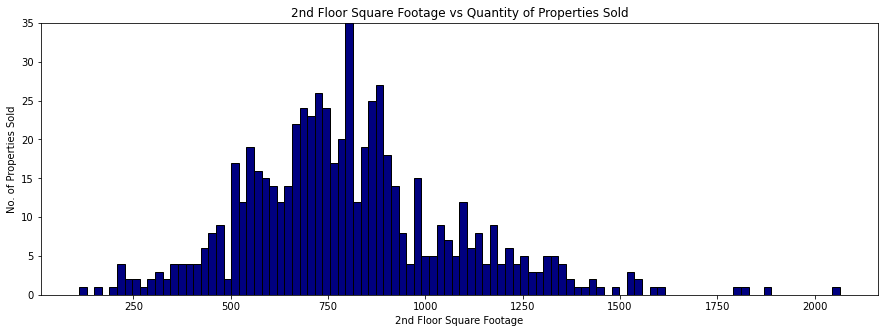

In [31]:
# Histogram of the 2ndFlrSF
plt.figure(figsize=(15,5))
plt.hist(features_abbr['2ndFlrSF'], bins=100, ec='black', color='navy')
plt.title('2nd Floor Square Footage vs Quantity of Properties Sold')
plt.xlabel('2nd Floor Square Footage')
plt.ylabel('No. of Properties Sold')

# To account for previously forced mean values, ylim is set
plt.ylim((0,35))

plt.show()

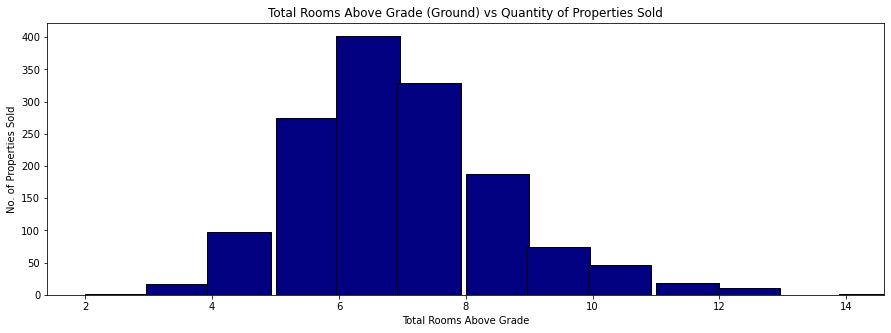

In [32]:
# Histogram of the total rooms above grade (ground)
plt.figure(figsize=(15,5))
plt.hist(features_abbr['TotRmsAbvGrd'], bins=100, ec='black', color='navy', width=1)
plt.title('Total Rooms Above Grade (Ground) vs Quantity of Properties Sold')
plt.xlabel('Total Rooms Above Grade')
plt.ylabel('No. of Properties Sold')
plt.show()

### Observations on Initial Histograms

The data tends to skew to the right. The analysis here logically assumes that this indicates that higher priced homes are outliers in the data, and thus lead to the skewing.

The data is otherwise primed for deeper analysis.

# Correlation

## $$ \rho _{XY} = corr(X, Y) $$

## Initial Correlation Calculations

In [33]:
# Temporarily Import the Target Value to the features_abbr dataset to use pandas native ability for calculating correlations
features_abbr['SalePrice'] = target['SalePrice']
temp_f = features_abbr.corr()

display(temp_f['SalePrice'])

# Remove 'SalePrice' from features
features_abbr.drop(['SalePrice'], axis=1, inplace=True)

LotArea         0.263843
TotalBsmtSF     0.601479
1stFlrSF        0.605852
2ndFlrSF        0.471111
LowQualFinSF    0.038150
GrLivArea       0.708624
BsmtFullBath    0.227122
BsmtHalfBath   -0.016844
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
TotRmsAbvGrd    0.533723
GarageArea      0.588088
GarageCars      0.640409
AgeWhenSold    -0.523350
SalePrice       1.000000
Name: SalePrice, dtype: float64

### Observations on Initial Correlation Calculations

#### $$ 0.5 < \rho _{X,Y} $$
#### High Positive Correlation

The columns `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`, `FullBath`, `TotRmsAbvGrd`, `GarageArea`, and `GarageCars` all display a high positive correlation. The more of each represented item, the higher the sale price.

#### $$ 0.25 < \rho _{X,Y} < 0.5 $$
#### Medium Positive Correlation

The columns `2ndFlrSF` and `HalfBath` display a medium amount of correlation. While there is some correlation, perhaps these columns are not as informative for predicting sale price.

#### $$ -0.25 < \rho _{X,Y} < 0.25 $$
#### Non-correlation

The columns `LowQualFinSF`, `BsmtFullBath`, `BsmtHalfBath`, `BedroomAbvGr`, and `KitchenAbrGr` all indicate that they do not produce a large amount of correlation.

The lack of influence of basement bathrooms, and bedrooms and kitchens above grade is surprising.

The lack of influence of the `LowQualFinSF` column on the other hand is not, due to its arbitrary evaluation method.

#### $$ \rho _{X,Y} < -0.5 $$
#### High Negative Correlation
The column `AgeWhenSold` shows highly negative correlation. The older the property, the less its sale price.

### Actions Taken

The following `10` columns of data remain in the primary focus of this analysis:

##### Continuous Columns
* `TotalBsmtSF`
* `1stFlrSF`
* `GrLivArea`
* `GarageArea`
* `2ndFlrSF`
* `AgeWhenSold`

##### Discrete Columns
* `FullBath`
* `TotRmsAbvGrd`
* `GarageCars`
* `HalfBath`

Columns not found in the above list of `10` are not yet dropped, but may be dropped at a later time.

## Searching for Multicollinearity

Multicollinearity between data columns can be a warning sign of additional problems in the data. 

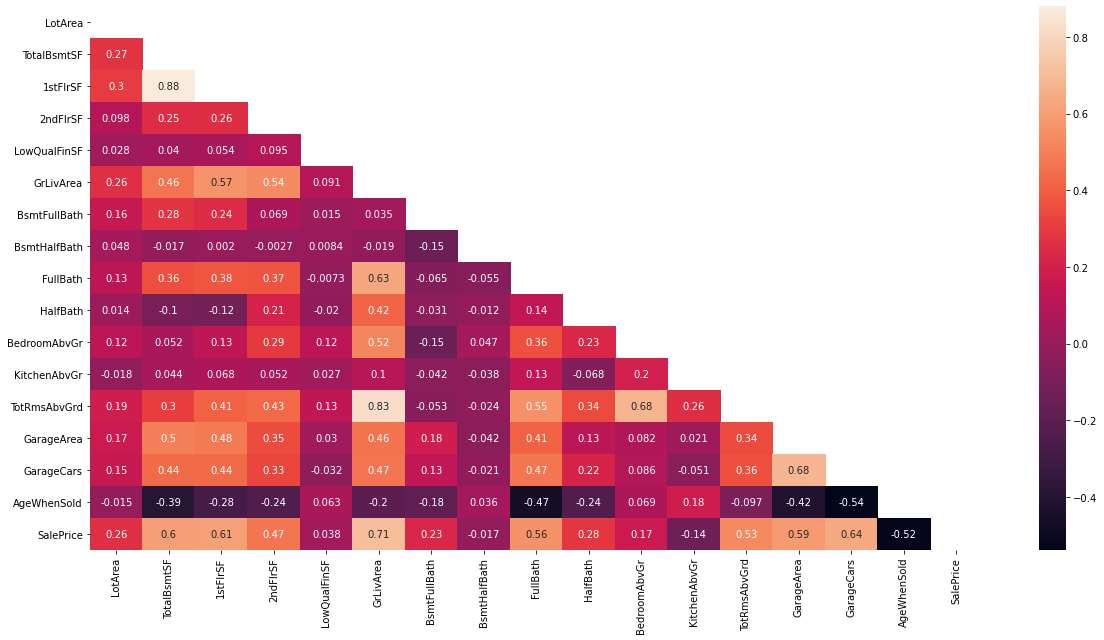

In [34]:
# Import the Target Value to the features_abbr dataset to use pandas native ability for calculating correlations
features_abbr['SalePrice'] = target['SalePrice']

# Create a mask to simplify data output
mask = np.zeros_like(features_abbr.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(20,10))
sns.heatmap(features_abbr.corr(), mask=mask, annot=True)
sns.set_style('dark')
plt.yticks()
plt.show()

## Observations on Multicollinearity

##### LotArea

This column seems to be less influential than most of the others. It is logically correlated with columns `GrLivArea` and `TotalBsmtSF`.

##### TotalBsmtSF

There appears to be a relationship between the `TotalBsmtSF` data and the `AgeWhenSold` data. From the Initial Data Observations, the `YearSold` for any house in this list is between the values of `2006` and `2010`, a dithefference of only `4` years. 

Therefore, a house that sold at a high value of `AgeWhenSold` is a house that is also old itself, and vice versa. Thus, the buildings that have large basements are sold at younger ages, and are also newer buildings. Perhaps basements were not popular in terms of architecture in Ames, IA, at the time the older buildings were built. Or, perhaps older buildings that have basements are not as likely to sell during the `2006` to `2010` time period.

`TotalBsmtSF` also has several other high multicollinearity values, including `GarageCars`, `GrLivArea`, and `1stFlrSF`.

##### 1stFlrSF

As with `TotalBsmtSF`, `1stFlrSF` also has moderate collinearity with other columns that are related to large houses, including `GarageCars`, `GarageArea`, `TotalRmsAbvGrd` and `GrLivArea`.

These columns may need to be reduced, again, to avoid overfitting.

##### 2ndFlrSF
The `2ndFlrSF` column is less influenced by multicollinearity, showing symptoms only with `GrLivArea`. 

##### LowqualFinSF

This is both low in correlation with the target values, and also low in terms of multicollinearity.

##### GrLivArea

`GrLivArea` is networked in tightly with the other columns, as mentioned before. One unique note is that `GrLivArea` has high correlation with `GarageCars`, with a value of `0.88`. 

However, the `GarageCars` column is a discrete variable, and therefore less reliable for correlation.

##### BsmtFullBath, BsmtHalfBath, HalfBath, KitchenAbvGrd, TotRmsAbvGrd

Low multicollinearity across the board, and also these columns are discrete, and therefore not a primary source for correlation information.

##### FullBath

Discrete in nature, but there is an interesting relationship between `FullBath` and `AgeWhenSold`, with a correlation of `-0.47`. Perhaps older buildings did not feature full baths often, and instead favored showering and washing in a mobile tub at that time.

There is also multicollinearity here between `GarageCars` and `TotalRmsAbvGrd`, both of which are logically connected to `FullBath`.

##### BedroomAbvGrd

This one is logically tied with multicollinearity to `TotRmsAbvGrd`.

This common cluster of columns, again, may need to be reduced in number to avoid overfitting.

##### GarageCars, Garage Area

There is an obvious logical relationship between these two, with multicollinearity measuring at `0.88`.

## Visualizing Potential Multicollinearity

### TotalBsmtSF vs AgeWhenSold

This odd relationship observed above likely does not portend a problem for the two columns, but this brief analysis compares the two to satisfy curiosity.

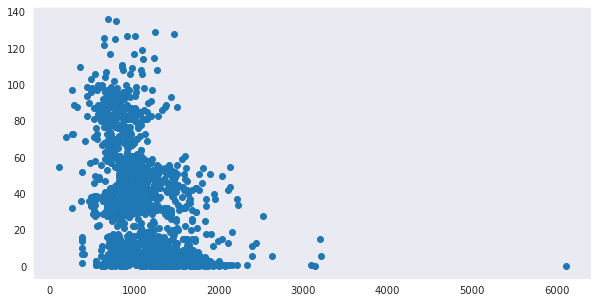

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(features_abbr['TotalBsmtSF'], features_abbr['AgeWhenSold'])

The data seems to indicate that of the houses that sold between `2006` and `2010`, those that had large basements (`> 2500 square feet`) were relatively young (`< 40 years`) at the time of sale.

### 1stFlrSF vs GrLivArea

The relationship between these two columns is logical, and also touches on many of the other highly related columns, such as `TotalBsmtSF`.

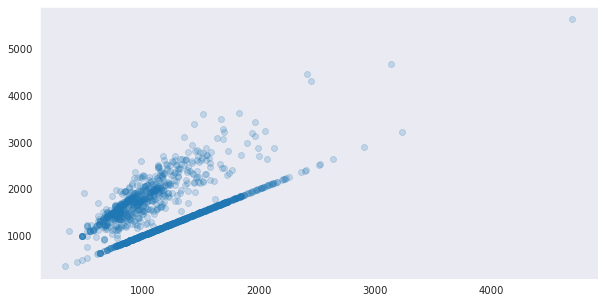

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(features_abbr['1stFlrSF'], features_abbr['GrLivArea'], alpha=0.2)
plt.show()

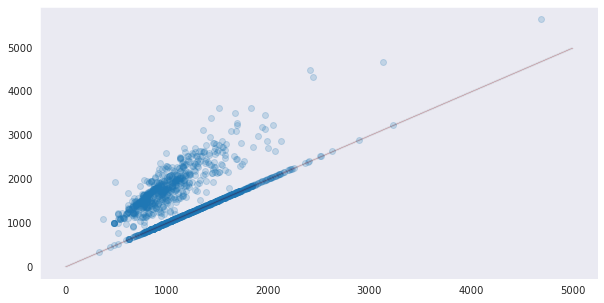

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(features_abbr['1stFlrSF'], features_abbr['GrLivArea'], alpha=0.2)
x = np.arange(5000)
y = np.arange(5000)
plt.scatter(x, y, color='darkred', alpha=0.01, s=1)
plt.show()

#### Hidden Relationship

These two columns appear to have a hidden linear relationship that stands apart from the rest of their data points.

These identical values lead to the conclusion that using both columns simultaneously with other columns leads to overfitting. One of these columns may need to be dropped.

### 2ndFlrSF vs GrLivArea

Recall that the `2ndFlrSF` column had all zero values set to the mean. 

A scatter plot here visualizes how this precautionary step influences the data.

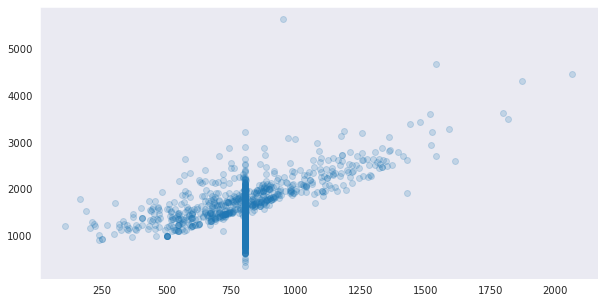

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(features_abbr['2ndFlrSF'], features_abbr['GrLivArea'], alpha=0.2)

##### The Mean Values Stabilze the Regression

Without setting all values to zero, the vertically linear data above would have been located where `x = 0`, thus causing more instability for a regression.

## Visualizing All Correlations with a Seaborn Pairplot

CPU times: user 0 ns, sys: 3.15 ms, total: 3.15 ms
Wall time: 8.73 ms


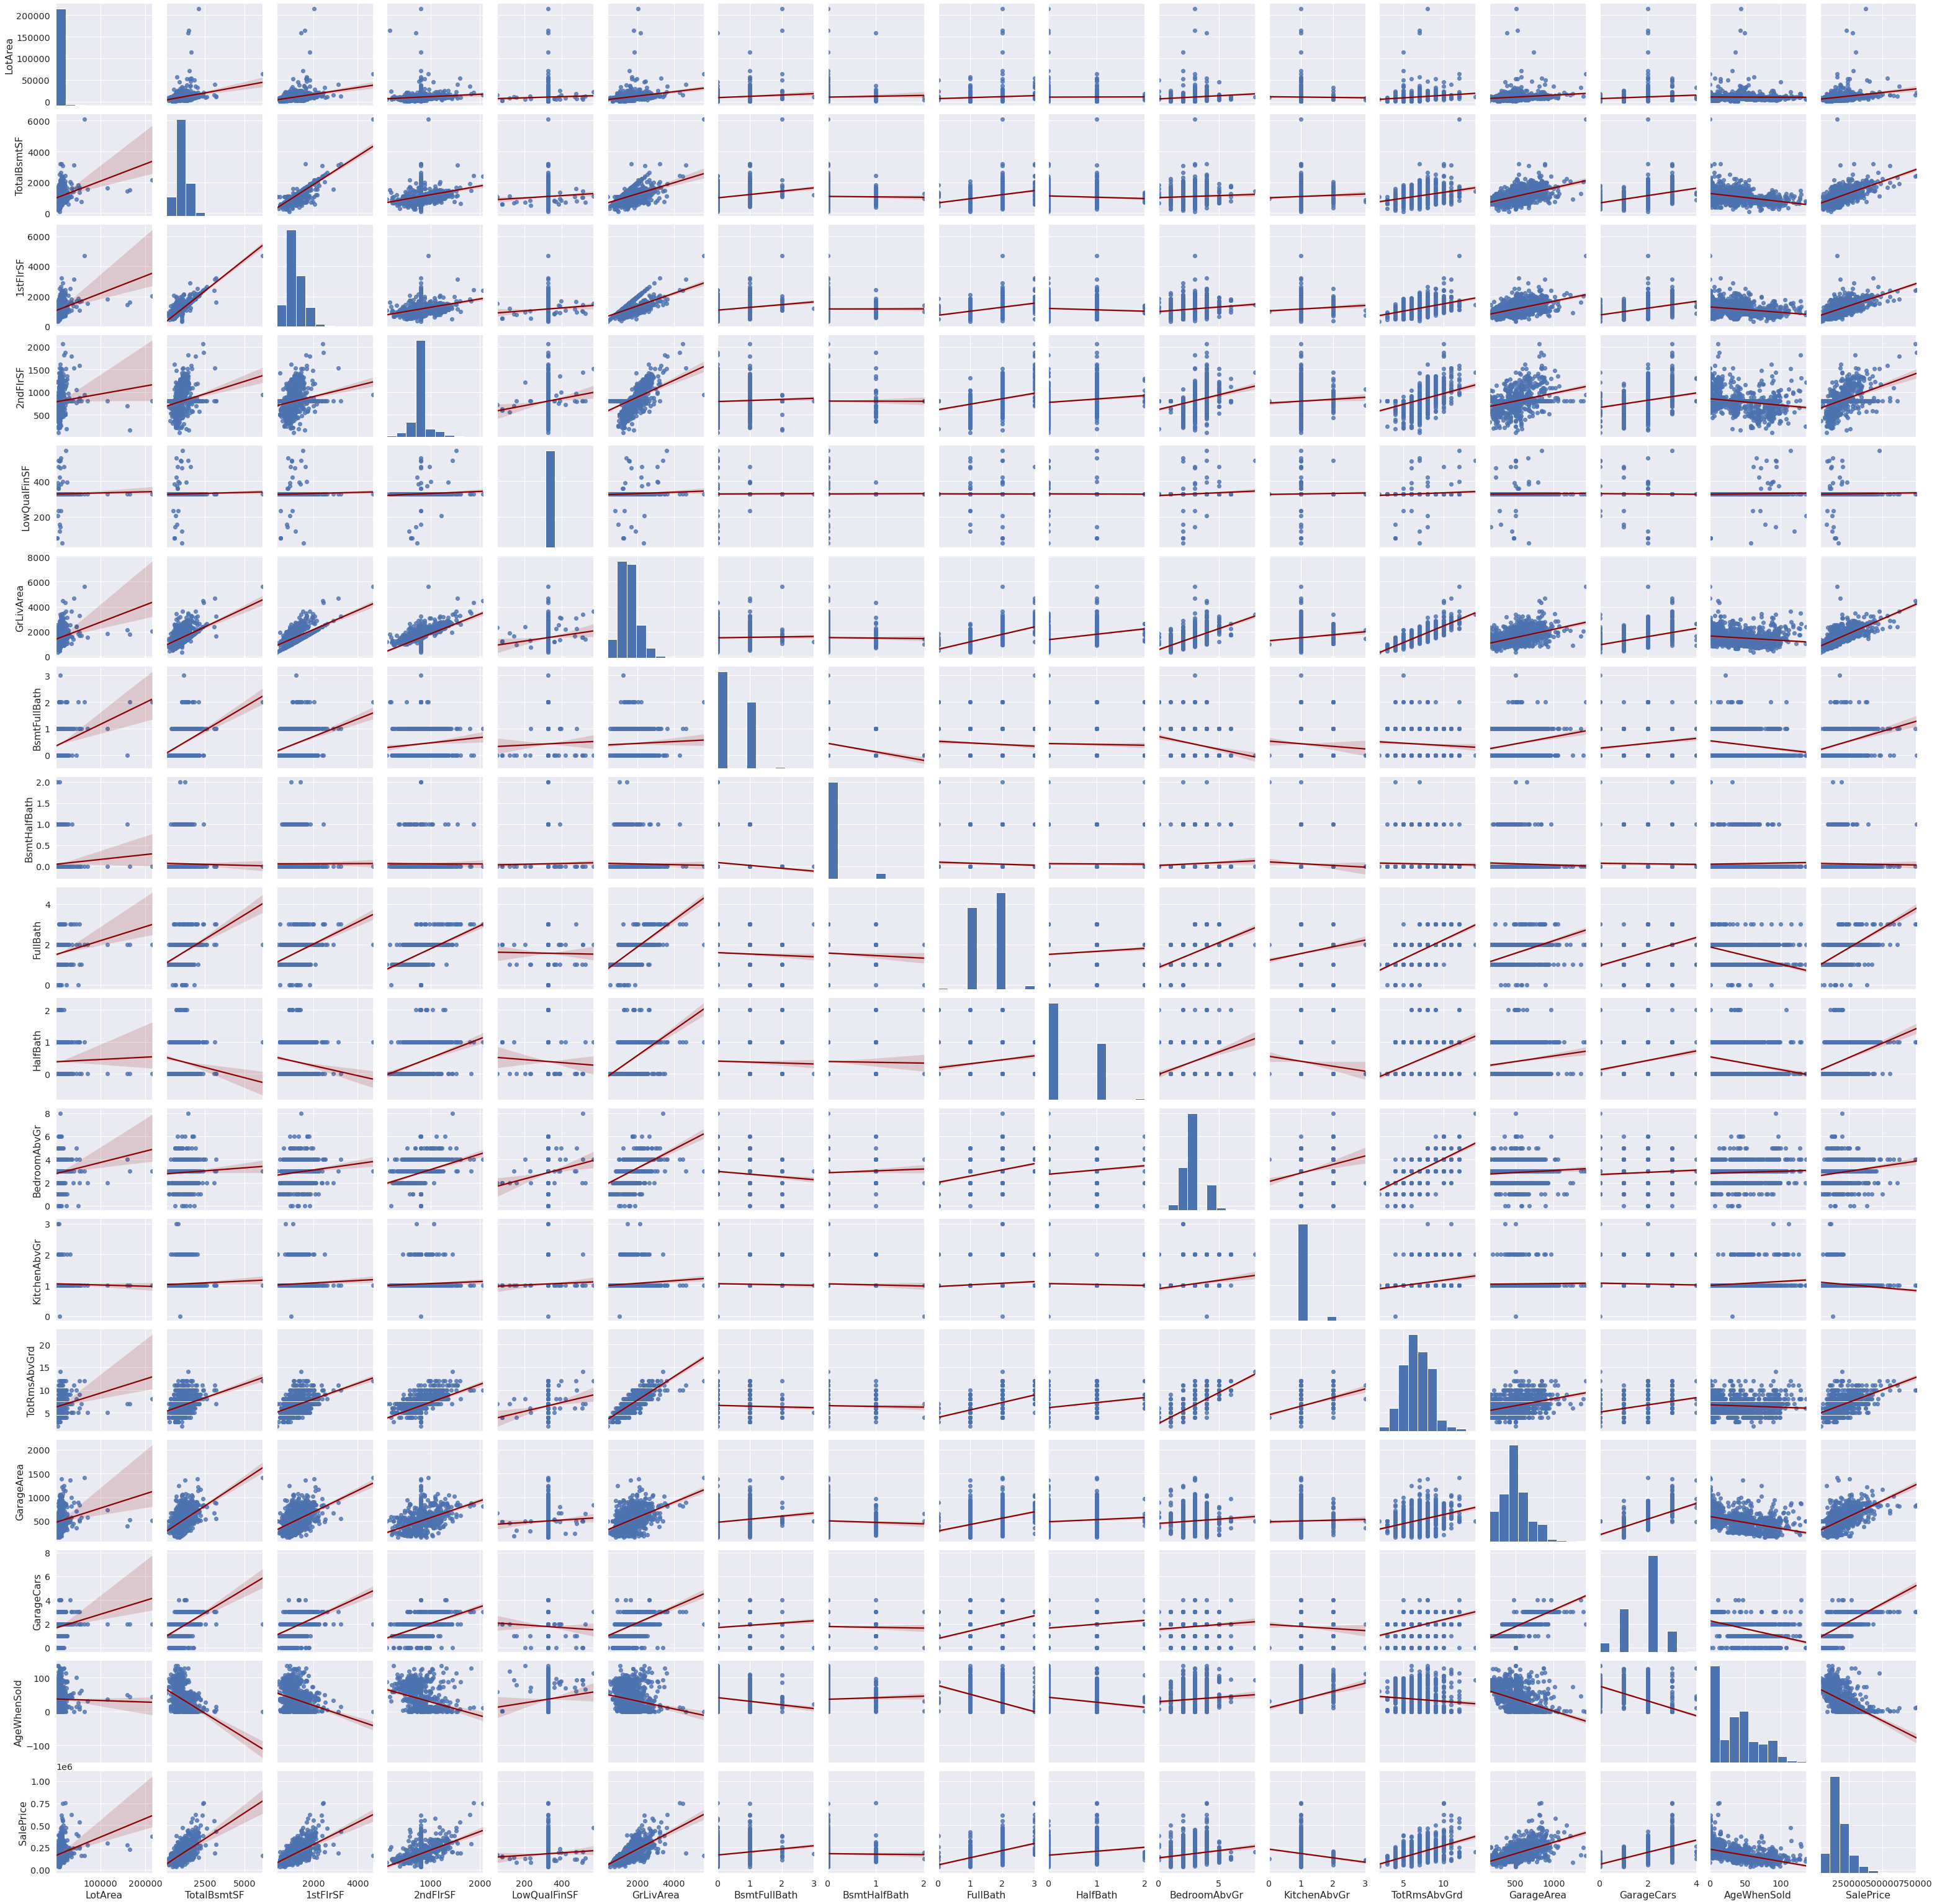

In [39]:
%%time
# # Comment out the following line when not in use to save time
# sns.set(font_scale=1.3)
# sns_plot = sns.pairplot(features_abbr, kind='reg', plot_kws={'line_kws': {'color': 'darkred'}})
# # [sns_plot.axes[len(features_abbr.columns) - 1][col].xaxis.set_visible(False) for col in range(len(features_abbr.columns))]
# # [sns_plot.axes[len(features_abbr.columns) - 1][col].yaxis.set_visible(False) for col in range(len(features_abbr.columns))]
# sns_plot.savefig('./pairplots.png', format='png')
Image('./pairplots.png')

# Multivariate Regression

## Splitting the Training and Testing Data

In [40]:
target = features_abbr['SalePrice']
features_abbr.drop(['SalePrice'], inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(features_abbr, target, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: ', regr.intercept_)
display(pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']))

Intercept:  40782.80554836968


,coef
LotArea,0.318585
TotalBsmtSF,27.161013
1stFlrSF,-0.395546
2ndFlrSF,42.830183
LowQualFinSF,5.910688
GrLivArea,56.530948
BsmtFullBath,13312.885490
BsmtHalfBath,9271.460965
FullBath,9595.296769
HalfBath,-1058.888078


## Initial Observations on Multivariable Regression

The above coefficients show the relevant constant values that accompany an increase in each variable unit. This provides the basis for the linear regression study of this brief analysis.

## R-Squared Values

Calculating the model fit.

In [41]:
train_r_squared_before = regr.score(X_train, y_train)
test_r_squared_before = regr.score(X_test, y_test)

print('Training data r-squared: ', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

Training data r-squared:  0.7561719452561865
Test data r-squared:  0.7595297524176189


## Data Transformations

In [42]:
target = DataFrame(target)
display(target['SalePrice'].skew())
display()

1.8828757597682129

#### Observations on Skew

The SalePrice column has a high skew level.

One way to correct is to fit the regression to the log of the SalePrice values.

In [43]:
y_log = np.log(target['SalePrice'])

In [44]:
y_log.skew()

0.12133506220520406

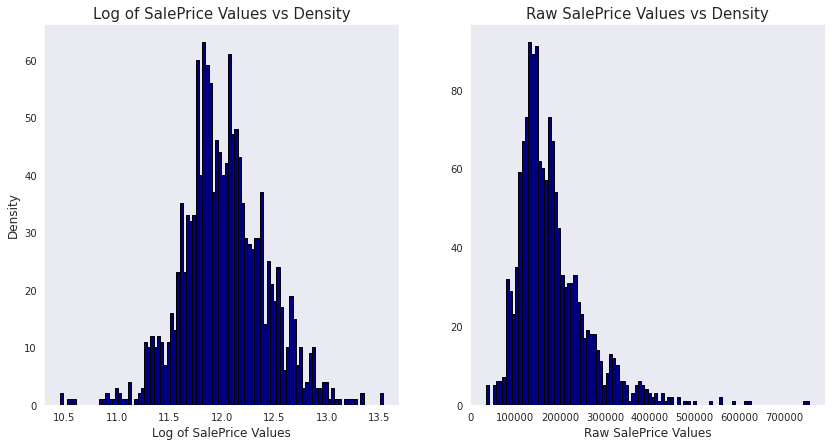

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

axes[0].hist(y_log, bins=100, ec='black', color='navy')
axes[0].set_title('Log of SalePrice Values vs Density', fontsize=15)
axes[0].set_xlabel('Log of SalePrice Values', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

axes[1].hist(target['SalePrice'], bins=100, ec='black', color='navy')
axes[1].set_title('Raw SalePrice Values vs Density', fontsize=15)
axes[1].set_xlabel('Raw SalePrice Values', fontsize=12)

plt.show()

#### Observations on Log Skew

The skew on the left logarithmic data is dramatically reduced.

## Transforming Features and Target

Looking at the PairPlot above, the AgeWhenSold values seem to also have a logarithmic disbursement. The following graphs show how the scatter plot that utilizes logarithmic consideration of the SalePrice values eliminates more of the skew.

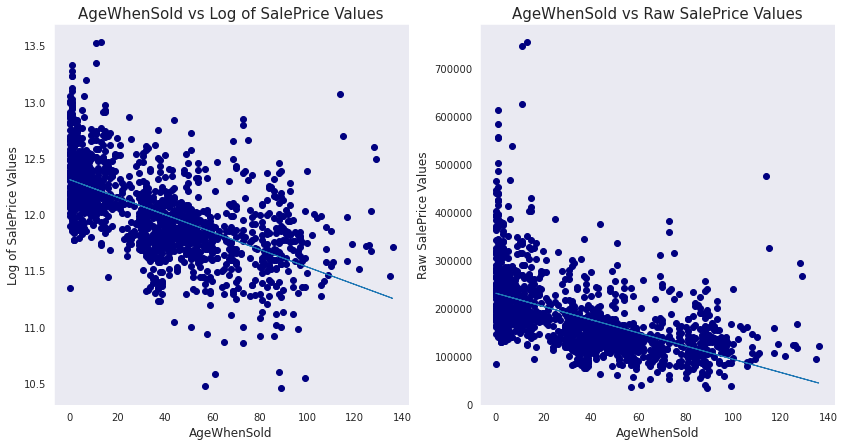

In [46]:
transformed_features = features_abbr
transformed_data = y_log

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

regr_0 = LinearRegression()
regr_0.fit(features_abbr[['AgeWhenSold']], y_log)

axes[0].scatter(features_abbr['AgeWhenSold'], y_log, color='navy')
axes[0].plot(features_abbr[['AgeWhenSold']], regr_0.predict(features_abbr[['AgeWhenSold']]), linewidth=1)
axes[0].set_title('AgeWhenSold vs Log of SalePrice Values', fontsize=15)
axes[0].set_xlabel('AgeWhenSold', fontsize=12)
axes[0].set_ylabel('Log of SalePrice Values', fontsize=12)

regr_1 = LinearRegression()
regr_1.fit(features_abbr[['AgeWhenSold']], target['SalePrice'])

axes[1].scatter(features_abbr['AgeWhenSold'], target['SalePrice'], color='navy')
axes[1].plot(features_abbr[['AgeWhenSold']], regr_1.predict(features_abbr[['AgeWhenSold']]), linewidth=1)
axes[1].set_title('AgeWhenSold vs Raw SalePrice Values', fontsize=15)
axes[1].set_xlabel('AgeWhenSold', fontsize=12)
axes[1].set_ylabel('Raw SalePrice Values', fontsize=12)

plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features_abbr, np.log(target['SalePrice']), test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared after log: ', regr.score(X_train, y_train))
print('Difference: %.3f' % (train_r_squared_before - regr.score(X_train, y_train)))
print(' ')


print('Test data r-squared log: ', regr.score(X_test, y_test))
print('Difference: %.3f' % (test_r_squared_before - regr.score(X_test, y_test)))
print(' ')

print('Intercept: ', regr.intercept_)
display(pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']))

Training data r-squared after log:  0.7864596282291402
Difference: -0.030
 
Test data r-squared log:  0.7859138462013221
Difference: -0.026
 
Intercept:  11.385253533529548


,coef
LotArea,0.000002
TotalBsmtSF,0.000027
1stFlrSF,0.000110
2ndFlrSF,0.000105
LowQualFinSF,0.000075
GrLivArea,0.000231
BsmtFullBath,0.087083
BsmtHalfBath,0.057240
FullBath,0.070632
HalfBath,0.019848


#### Observations on Log Regression

The r-squared values have improved by approximately 0.03, each. Therefore, the skew is lessened and the regressions are more accurate.

### P-Values and Statistical Significance

In [48]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)

results = model.fit()

display(pd.DataFrame({'coef': round(results.params, 3), 'p-value': round(results.pvalues, 3)}))

,coef,p-value
const,11.385,0.000
LotArea,0.000,0.003
TotalBsmtSF,0.000,0.386
1stFlrSF,0.000,0.002
2ndFlrSF,0.000,0.004
LowQualFinSF,0.000,0.742
GrLivArea,0.000,0.000
BsmtFullBath,0.087,0.000
BsmtHalfBath,0.057,0.016
FullBath,0.071,0.000


#### Observations on P-Values

The columns of `TotalBsmtSF`, `LowqualFinSF`, `HalfBath`, and `GarageArea` appear to be statistically insignificant.

# Testing for Multicollinearity
$$ SalePrice = \thea _0 + \theta _1 * LotArea + \theta _2 * 1stFlrSF + ... + \theta _{12} * AgeWhenSold  $$

$$ VIF _{SalePrice} = \frac{1}{(1 - R _{SalePrice} ^ 2)} $$

In [49]:
display(variance_inflation_factor(exog=X_incl_const.values, exog_idx=1))
display(X_incl_const.shape)

vif = []
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
    
    
display(pd.DataFrame({'coef': round(results.params, 3), 'p-value': round(results.pvalues, 3), 'vif': np.around(vif, 3)}))

1.166603076246449

(1168, 17)

,coef,p-value,vif
const,11.385,0.000,248.231
LotArea,0.000,0.003,1.167
TotalBsmtSF,0.000,0.386,5.396
1stFlrSF,0.000,0.002,6.394
2ndFlrSF,0.000,0.004,1.512
LowQualFinSF,0.000,0.742,1.060
GrLivArea,0.000,0.000,7.304
BsmtFullBath,0.087,0.000,1.264
BsmtHalfBath,0.057,0.016,1.053
FullBath,0.071,0.000,2.760


## Discussion on P-Values and Dropping a Column

The column with the highest p-value is `LowQualFinSF`, with a value of `0.742`.

This brief analysis now examines whether the model receives a benefit by dropping `LowQualFinSF`.

## Model Simplification & the Bayesian Information Criterion

In [50]:
# Original model with log prices and first set of abbreviated features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)

results = model.fit()

original_model = pd.DataFrame({'coef': round(results.params, 3), 'p-value': round(results.pvalues, 3)})

#### Model Statistics

In [51]:
print('The Original Bayesian Information Criterion: ', results.bic)
print('The Original R-squared Value: ', round(results.rsquared, 3))

The Original Bayesian Information Criterion:  -544.7693539232862
The Original R-squared Value:  0.786


In [52]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['LowQualFinSF'], axis=1)

model = sm.OLS(y_train, X_incl_const)

results = model.fit()

model_minus_LowQualFinSF = pd.DataFrame({'coef': round(results.params, 3), 'p-value': round(results.pvalues, 3)})

print('The Adapted Bayesian Information Criterion: ', results.bic)
print('The Adapted R-squared Value: ', round(results.rsquared, 3))

The Adapted Bayesian Information Criterion:  -551.7221209614236
The Adapted R-squared Value:  0.786


### Discussion After Removing LowQualFinSF

Neither the BIC nor the r-squared value made large movements. Therefore, dropping `LowQualFinSF` allows for simplification of the model without damaging the results.

The next highest P-Value is `TotalBsmtSF`, followed by `HalfBath` and `GarageArea`, and dropping these columns from the results also yields small changes in the model fit.

In [53]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['LowQualFinSF', 'TotalBsmtSF', 'HalfBath', 'GarageArea'], axis=1)

model = sm.OLS(y_train, X_incl_const)

results = model.fit()

model_reduced = pd.DataFrame({'coef': round(results.params, 3), 'p-value': round(results.pvalues, 3)})

print('The Adapted Bayesian Information Criterion: ', results.bic)
print('The Adapted R-squared Value: ', round(results.rsquared, 3))

The Adapted Bayesian Information Criterion:  -569.9978674160768
The Adapted R-squared Value:  0.786


In [54]:
frames = [original_model, model_minus_LowQualFinSF, model_reduced]

In [55]:
pd.concat(frames, axis=1)

,coef,p-value,coef,p-value,coef,p-value
const,11.385,0.000,11.409,0.000,11.429,0.000
LotArea,0.000,0.003,0.000,0.003,0.000,0.002
TotalBsmtSF,0.000,0.386,0.000,0.382,NaN,NaN
1stFlrSF,0.000,0.002,0.000,0.002,0.000,0.000
2ndFlrSF,0.000,0.004,0.000,0.004,0.000,0.006
LowQualFinSF,0.000,0.742,NaN,NaN,NaN,NaN
GrLivArea,0.000,0.000,0.000,0.000,0.000,0.000
BsmtFullBath,0.087,0.000,0.087,0.000,0.086,0.000
BsmtHalfBath,0.057,0.016,0.057,0.016,0.057,0.017
FullBath,0.071,0.000,0.070,0.000,0.062,0.000


# Residuals & Residual Plots

In [61]:
# Generate modified model: use log values and drop all high p-value features
target = np.log(data_train['SalePrice'])
features_final = DataFrame(data_train, columns=[
                                            'LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
                                            'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 
                                            'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'YrSold', 'YearBuilt'
                                            ])

# Combine YearSold and YearBlt into AgeWhenSold
features_final['AgeWhenSold'] = features_final['YrSold'] - features_final['YearBuilt']

# Drop YrSold and 'YearBuilt'
features_final.drop(['YrSold', 'YearBuilt'], inplace=True, axis=1)

# Set column names for averaging out zero values
cols_for_z_avg = ['LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea']

# Set all appropriate zero values to NaN using the mask method
for i in range(len(cols_for_z_avg)):
    features_final[cols_for_z_avg[i]] = features_final[cols_for_z_avg[i]].mask(features_final[cols_for_z_avg[i]] == 0)
    
# Fill all NaN values with the mean of that column
for i in range(len(cols_for_z_avg)):
    features_final[cols_for_z_avg[i]] = features_final[cols_for_z_avg[i]].fillna(round(features_final[cols_for_z_avg[i]].mean(), 0))

# Display Target & Features
display(pd.concat([target, features_final], axis=1))

X_train, X_test, y_train, y_test = train_test_split(features_final, target, test_size=0.2, random_state=10)

X_train = features_final
y_train = target


# Using Scikit-Learn
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared: ', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercept: ', regr.intercept_)

display(pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']))

,SalePrice,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,AgeWhenSold
0,12.247694,8450,856,854.0,1710,1,0,2,3,1,8,2,5
1,12.109011,9600,1262,803.0,1262,0,1,2,3,1,6,2,31
2,12.317167,11250,920,866.0,1786,1,0,2,3,1,6,2,7
3,11.849398,9550,961,756.0,1717,1,0,1,3,1,7,3,91
4,12.429216,14260,1145,1053.0,2198,1,0,2,4,1,9,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072541,7917,953,694.0,1647,0,0,2,3,1,7,2,8
1456,12.254863,13175,2073,803.0,2073,1,0,2,3,1,7,2,32
1457,12.493130,9042,1188,1152.0,2340,0,0,2,4,1,9,1,69
1458,11.864462,9717,1078,803.0,1078,1,0,1,2,1,5,1,60


Training data r-squared:  0.7862319535894006
Test data r-squared:  0.7911147176162218
Intercept:  11.415509840736183


,coef
LotArea,0.000002
1stFlrSF,0.000129
2ndFlrSF,0.000045
GrLivArea,0.000276
BsmtFullBath,0.083220
BsmtHalfBath,0.055839
FullBath,0.052563
BedroomAbvGr,-0.032599
KitchenAbvGr,-0.283147
TotRmsAbvGrd,0.028974


In [62]:
# Using Statsmodel API

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

residuals = y_train - results.fittedvalues

display(len(residuals))
print(' ')
display(results.resid)

1460

0      -0.045236
1       0.064278
2       0.054835
3      -0.183666
4      -0.150776
          ...   
1455   -0.084701
1456   -0.176588
1457    0.392021
1458    0.128291
1459    0.036973
Length: 1460, dtype: float64

0.887

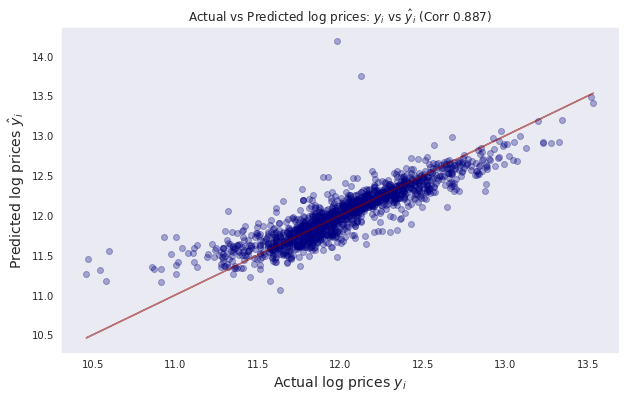

In [63]:
# Graph of Log Actual vs Resid
corr = round(y_train.corr(results.fittedvalues), 3)
display(corr)

plt.figure(figsize=(10,6))

plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.3)
plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y _i$ (Corr {corr})')
plt.plot(y_train, y_train, alpha=0.5, color='darkred')
plt.show()

0.887

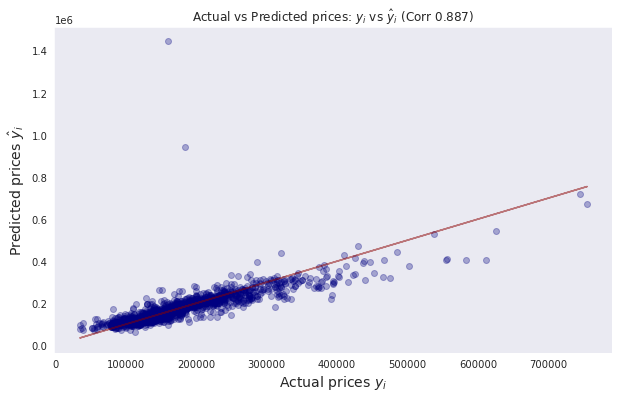

In [64]:
# Graph of Actual vs Resid
corr = round(y_train.corr(results.fittedvalues), 3)
display(corr)

plt.figure(figsize=(10,6))

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='navy', alpha=0.3)
plt.xlabel('Actual prices $y _i$', fontsize=14)
plt.ylabel('Predicted prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y _i$ (Corr {corr})')
plt.plot(np.e**y_train, np.e**y_train, alpha=0.5, color='darkred')
plt.show()

## Observations on Actual vs Predicted Graph

The predicted values are high on the lower end of the graph, and low on the higher end of the graph. In the middle of the graph, the predicted values are fairly close to the predicted

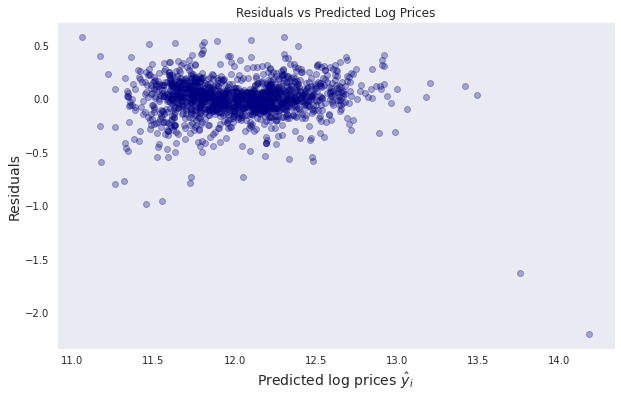

In [65]:
# Residuals vs Predicted Values
plt.figure(figsize=(10,6))

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.3)
plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Predicted Log Prices')
plt.show()

0.0

-2.122

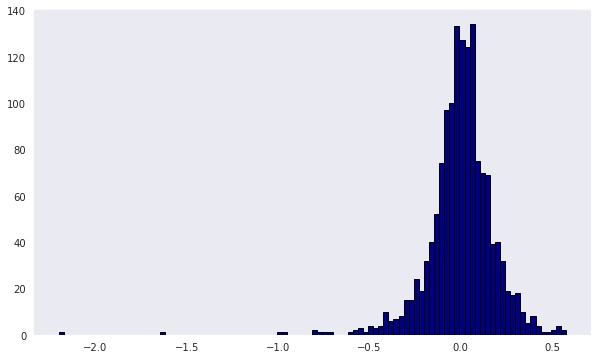

In [66]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
display(resid_mean, resid_skew)

plt.figure(figsize=(10,6))
plt.hist(results.resid, bins=100, ec='black', color='navy')
plt.show()

In [67]:
# Calculating the MSE

reduced_log_mse = round(results.mse_resid, 3)
reduced_log_r_squared = round(results.rsquared, 3)

# Saving Fitted Values to Competition Submission CSV File

The fitted values are now the final result of this brief exercise and are saved for competition submission.

In [93]:
submission = pd.concat([data_train['Id'], np.e**results.fittedvalues], axis=1)
submission.columns = ['Id', 'SalePrice']
display(submission)
submission.to_csv('./bryan_beus_kaggle_submission.csv')

,Id,SalePrice
0,1,218148.389185
1,2,170200.521724
2,3,211574.406367
3,4,168225.993794
4,5,290684.015020
...,...,...
1455,1456,190468.470386
1456,1457,250559.339990
1457,1458,180071.308335
1458,1459,125012.825732
